Importing Libraries

In [1]:
import numpy as np   #numerical python for mathametical opperatioins 
import pandas as pd  #data manupulation usind pandas
import matplotlib.pyplot as plt  #visualization using plots 
import seaborn as sns            #visualization using plots 
from warnings import filterwarnings  
filterwarnings("ignore")         #to ignore warnings
#statistical test
from sklearn.model_selection import train_test_split #to split data into train and test data 
from sklearn.linear_model import LinearRegression    #for predection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation matrix
from sklearn.metrics import mean_squared_error,r2_score #Evaluation matrix
from sklearn.preprocessing import StandardScaler        #used to scale the features
from sklearn.model_selection import RandomizedSearchCV  #to find the best hyperparameters

Importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\Cellphone.csv")

In [3]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
data.shape

(161, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


Exploratory data analysis

Price(Target Variable)

In [7]:
data.Price.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [8]:
data.Price.describe()

count     161.000000
mean     2215.596273
std       768.187171
min       614.000000
25%      1734.000000
50%      2258.000000
75%      2744.000000
max      4361.000000
Name: Price, dtype: float64

In [9]:
data[data.duplicated()]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


<Axes: >

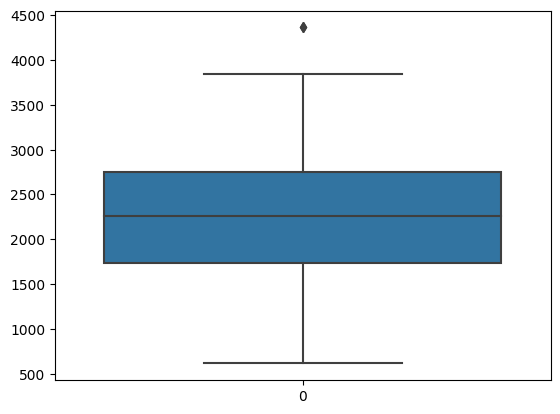

In [10]:
sns.boxplot(data.Price)

<Axes: xlabel='Price', ylabel='Density'>

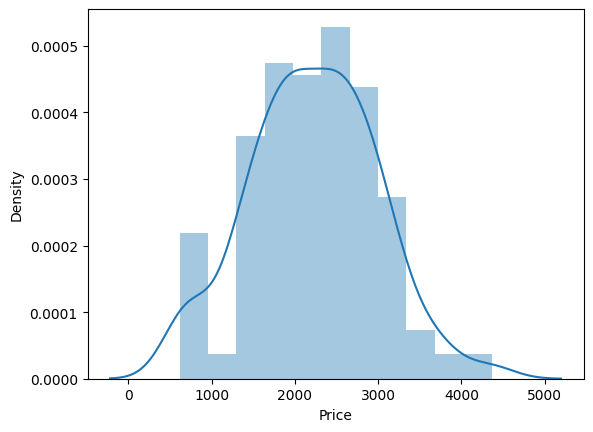

In [11]:
sns.distplot(data.Price)

Indipendent Variables

In [12]:
def num(num_feature):
    print("Data Type\n",data[num_feature].dtype)
    print("Unique Datas\n",data[num_feature].unique())
    print("Describing the data\n",data[num_feature].describe())

    sns.scatterplot(x=num_feature,y="Price",data=data)
    plt.show()
    sns.boxplot(data[num_feature])

    print("correlation\n",np.corrcoef(data[num_feature],data.Price))

In [13]:
data.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

Product_id

Data Type
 int64
Unique Datas
 [ 203  880   40   99  947  774 1103  289  605  622 1058 1120  187  315
  860  990  104  776   10 1145 1020 1339  662  575  907  162  974  739
  738  804   43 1248   93  563  577  218   56  198   14  857  937   66
 1221 1011 1026 1216  237  763  131 1062  841 1143  183 1080  827  133
  832  637   64   30  409  143  798  460 1327 1198 1112  696 1089  497
  301  377  701 1161   32 1137  851  826  290 1131 1206 1296  856]
Describing the data
 count     161.000000
mean      675.559006
std       410.851583
min        10.000000
25%       237.000000
50%       774.000000
75%      1026.000000
max      1339.000000
Name: Product_id, dtype: float64


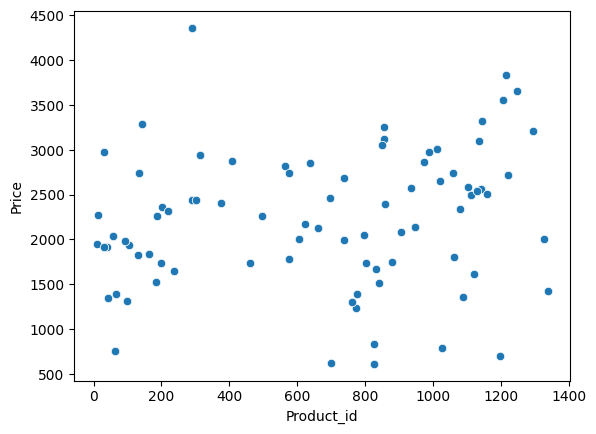

correlation
 [[1.         0.16513581]
 [0.16513581 1.        ]]


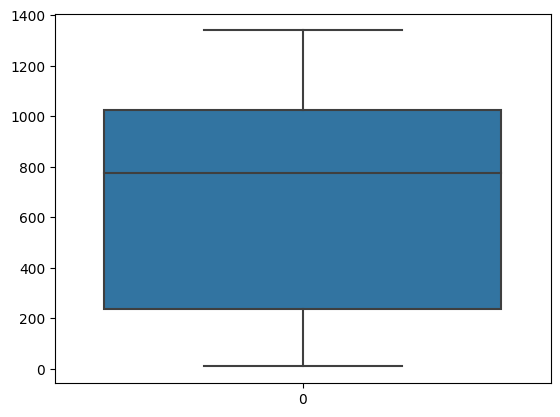

In [14]:
num("Product_id")

In [15]:
data.drop("Product_id",axis=1,inplace=True)

Sale

Data Type
 int64
Unique Datas
 [  10   11   12   13   14   15   16   17   19   20   21   22   23   24
   25   26   30   31   32   34   35   36   37   38   40   41   42   43
   45   52   57   58   66   67   71   72   73   75   82   87   89   91
   93   94   96   98  100  101  103  106  109  111  113  114  119  121
  140  141  143  156  164  166  178  179  187  198  201  204  206  208
  213  214  256  268  285  299  302  307  308  309  344  367  373  378
  382  385  393  399  418  423  427  455  456  499  523  564  567  599
  615  616  678  996 1009 1043 1224 1274 1530 1584 1781 1862 2071 2088
 2106 2159 2171 2173 3248 3291 3619 4408 4638 8016 8809 8946 9807]
Describing the data
 count     161.000000
mean      621.465839
std      1546.618517
min        10.000000
25%        37.000000
50%       106.000000
75%       382.000000
max      9807.000000
Name: Sale, dtype: float64


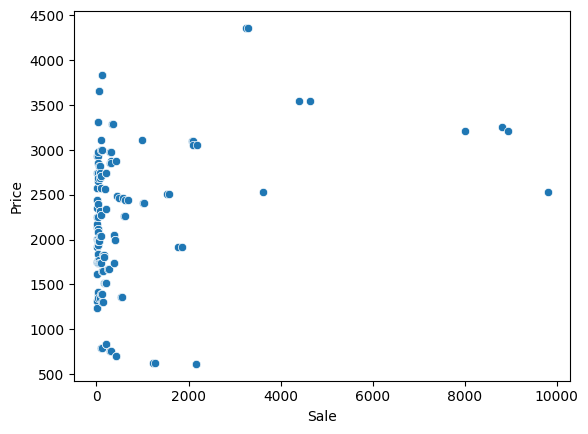

correlation
 [[1.         0.27326252]
 [0.27326252 1.        ]]


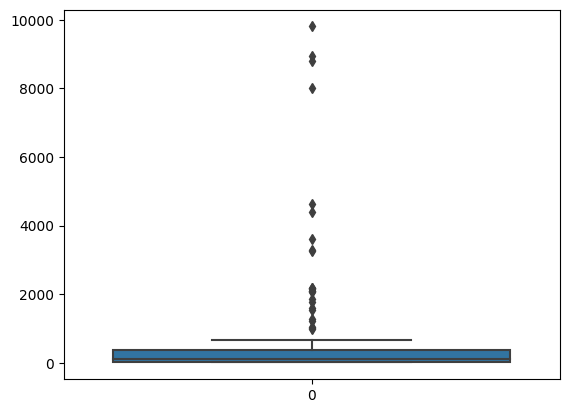

In [16]:
num("Sale")

In [17]:
data.drop("Sale",axis=1,inplace=True)

Weight

Data Type
 float64
Unique Datas
 [135.  125.  110.  118.5 150.  134.1 145.  162.  161.  140.  174.  141.
 168.  147.  152.  139.2 146.  118.  144.  151.  120.  489.  133.5 169.
 131.  260.  154.  175.  158.   97.  310.  128.  116.  153.  279.  156.
 171.   66.  167.8 404.  127.9 393.  134.  187.  160.   78.4 142.   77.9
 149.  170.  194.8 753.  165.  112.  183.  102.9 179.  180.   69.8 238.
 202.  178. ]
Describing the data
 count    161.000000
mean     170.426087
std       92.888612
min       66.000000
25%      134.100000
50%      153.000000
75%      170.000000
max      753.000000
Name: weight, dtype: float64


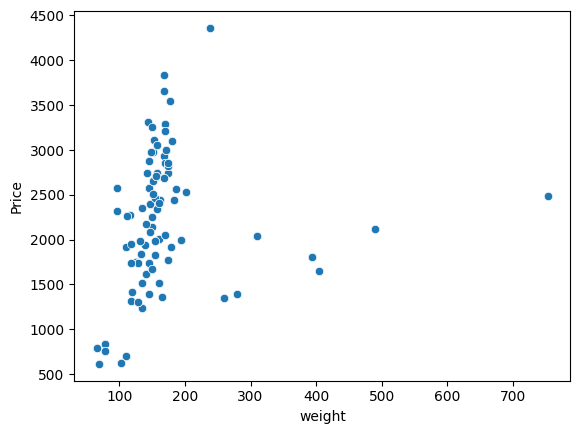

correlation
 [[1.         0.14455512]
 [0.14455512 1.        ]]


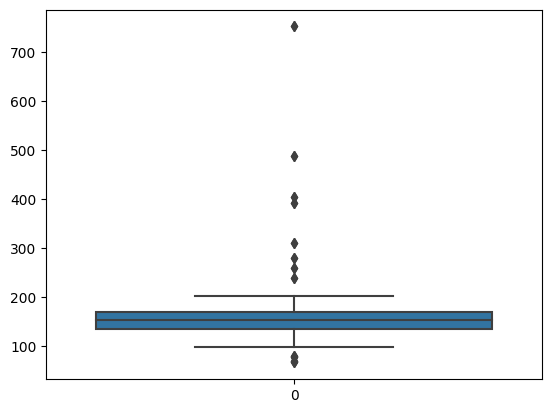

In [18]:
num("weight")

In [19]:
data.drop("weight",axis=1,inplace=True)

Resoloution

Data Type
 float64
Unique Datas
 [ 5.2   4.    4.7   5.5   5.1   5.3   5.    5.6   5.7  10.1   4.5   7.
  5.15  4.8   8.    1.5   5.43  6.    2.4   2.2  12.2   4.66  1.4   5.46]
Describing the data
 count    161.000000
mean       5.209938
std        1.509953
min        1.400000
25%        4.800000
50%        5.150000
75%        5.500000
max       12.200000
Name: resoloution, dtype: float64


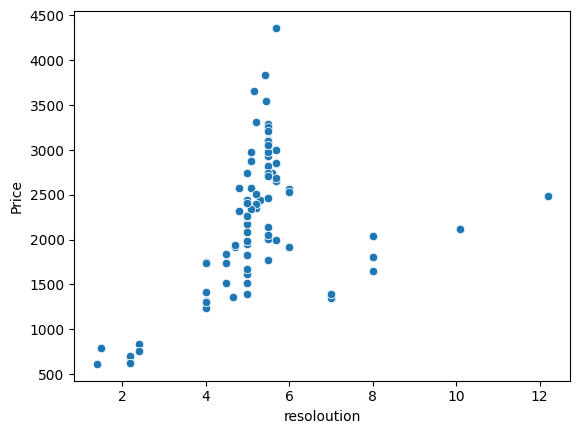

correlation
 [[1.         0.40400956]
 [0.40400956 1.        ]]


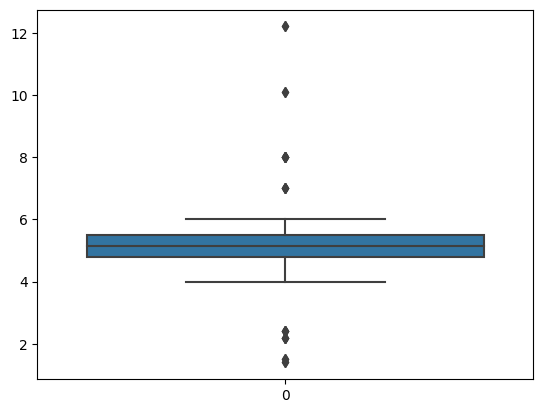

In [20]:
num("resoloution")

In [21]:
data.drop("resoloution",axis=1,inplace=True)

PPI

Data Type
 int64
Unique Datas
 [424 233 312 401 432 277 200 294 524 441 534 282 577 469 220 187 428 386
 224 178 218 515 245 170 306 283 121 541 160 235 189 221 367 166 440 513
 167 403 258 128 247 184 806 129 538]
Describing the data
 count    161.000000
mean     335.055901
std      134.826659
min      121.000000
25%      233.000000
50%      294.000000
75%      428.000000
max      806.000000
Name: ppi, dtype: float64


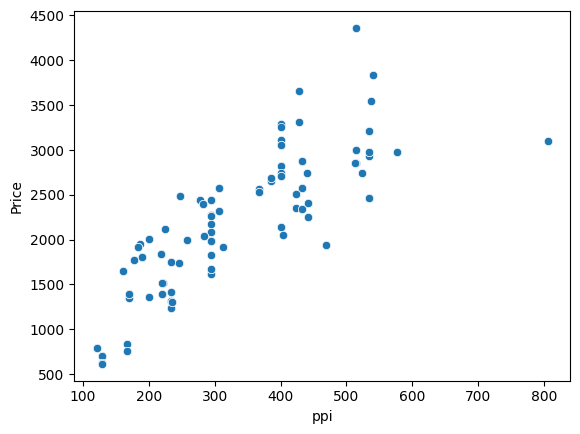

correlation
 [[1.         0.81761445]
 [0.81761445 1.        ]]


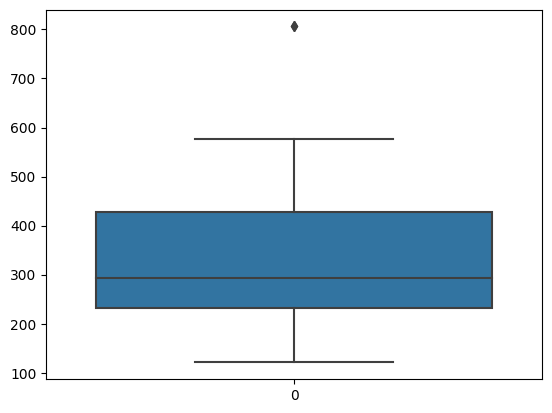

In [22]:
num("ppi")

Cpu Core

Data Type
 int64
Unique Datas
 [8 2 4 6 1 0]
Describing the data
 count    161.000000
mean       4.857143
std        2.444016
min        0.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cpu core, dtype: float64


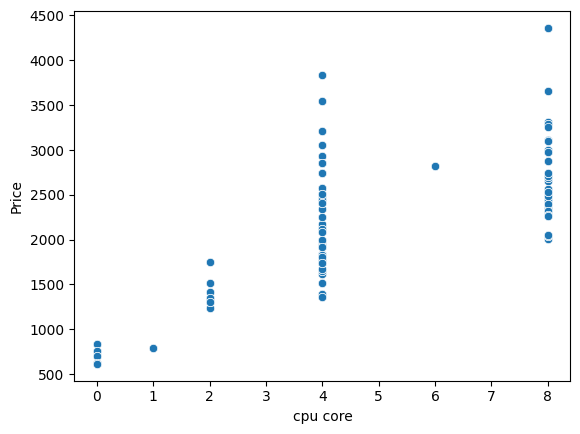

correlation
 [[1.         0.68681064]
 [0.68681064 1.        ]]


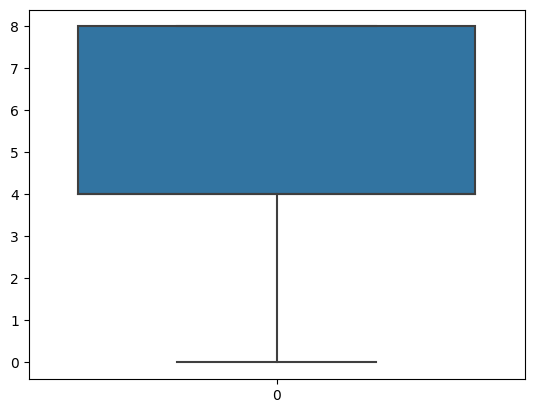

In [23]:
num("cpu core")

Cpu Freq

Data Type
 float64
Unique Datas
 [1.35  1.3   1.2   2.3   2.5   1.5   1.4   2.7   1.875 2.15  1.75  1.55
 1.    2.26  1.8   2.45  1.53  1.83  1.7   2.    0.208 0.    1.25  1.6
 2.1   1.95  1.975 2.2  ]
Describing the data
 count    161.000000
mean       1.502832
std        0.599783
min        0.000000
25%        1.200000
50%        1.400000
75%        1.875000
max        2.700000
Name: cpu freq, dtype: float64


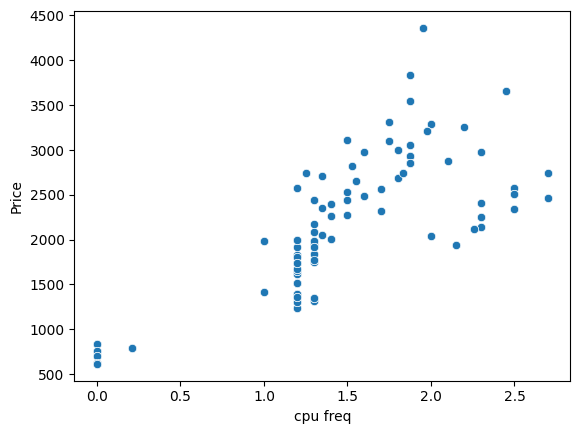

correlation
 [[1.         0.72738283]
 [0.72738283 1.        ]]


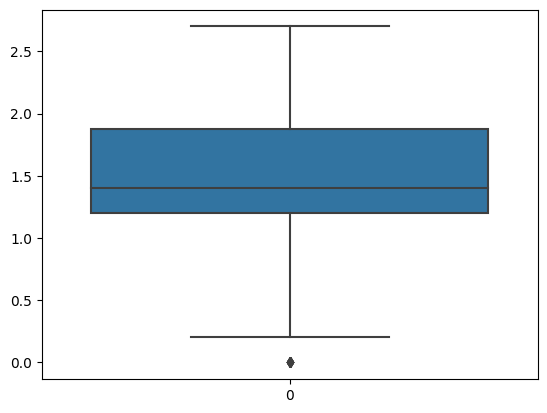

In [24]:
num("cpu freq")

Internal Mem

Data Type
 float64
Unique Datas
 [1.60e+01 4.00e+00 8.00e+00 3.20e+01 6.40e+01 0.00e+00 1.28e+02 4.00e-03
 1.28e-01 2.56e-01]
Describing the data
 count    161.000000
mean      24.501714
std       28.804773
min        0.000000
25%        8.000000
50%       16.000000
75%       32.000000
max      128.000000
Name: internal mem, dtype: float64


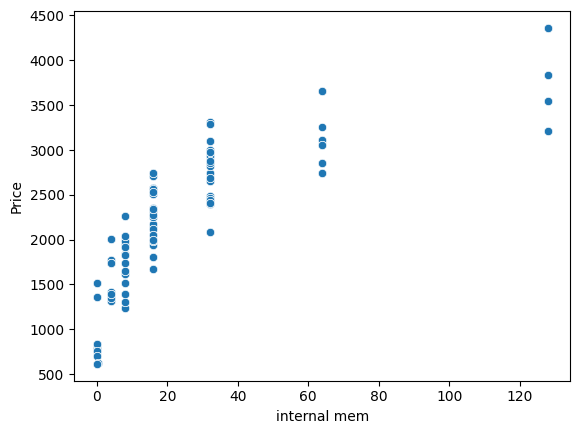

correlation
 [[1.         0.77673777]
 [0.77673777 1.        ]]


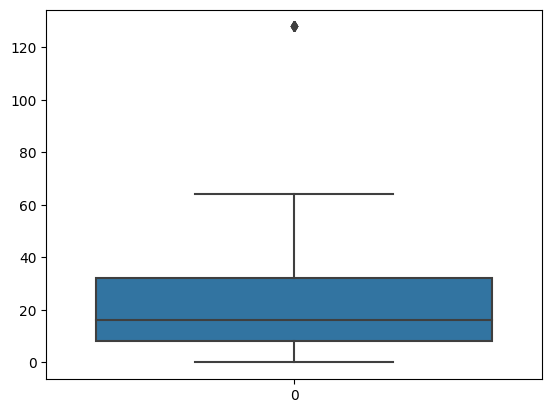

In [25]:
num("internal mem")

In [26]:
intmem=data[data["internal mem"]>100].index
data.drop(intmem,axis=0,inplace=True)

Ram

Data Type
 float64
Unique Datas
 [3.00e+00 1.00e+00 1.50e+00 5.12e-01 2.00e+00 4.00e+00 6.00e+00 4.00e-03
 8.00e-03 3.20e-02 0.00e+00 1.28e-01]
Describing the data
 count    153.000000
mean       2.006562
std        1.389358
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: ram, dtype: float64


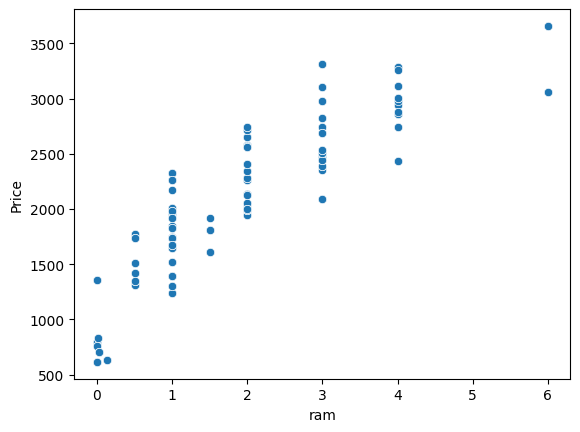

correlation
 [[1.         0.87723934]
 [0.87723934 1.        ]]


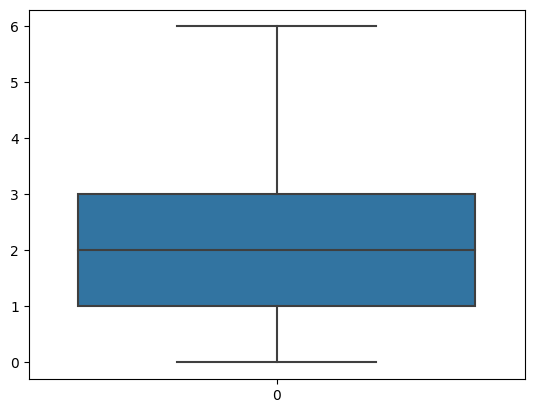

In [27]:
num("ram")

RearCam

Data Type
 float64
Unique Datas
 [13.    3.15 16.    2.    5.    8.   12.3  12.   20.7  21.    3.    0.
 10.   20.    4.    1.3  23.   21.5 ]
Describing the data
 count    153.000000
mean      10.136601
std        6.201708
min        0.000000
25%        5.000000
50%       10.000000
75%       16.000000
max       23.000000
Name: RearCam, dtype: float64


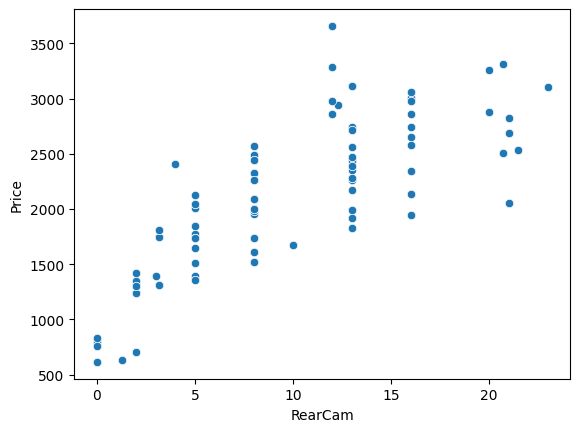

correlation
 [[1.       0.778774]
 [0.778774 1.      ]]


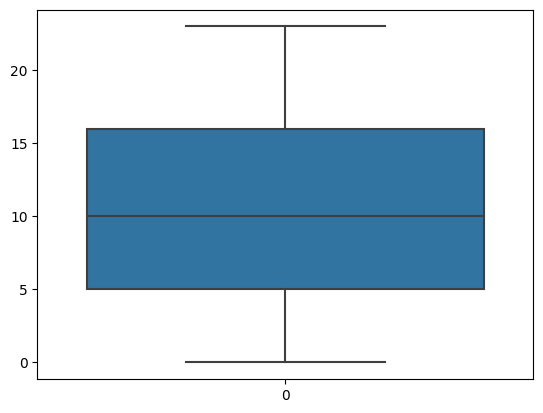

In [28]:
num("RearCam")

Front_Cam

Data Type
 float64
Unique Datas
 [ 8.   0.   5.   2.   3.7  1.2 16.   4.   5.1 13.   0.9  1.   2.1  2.2
 20. ]
Describing the data
 count    153.000000
mean       4.215686
std        4.188159
min        0.000000
25%        0.000000
50%        5.000000
75%        5.000000
max       20.000000
Name: Front_Cam, dtype: float64


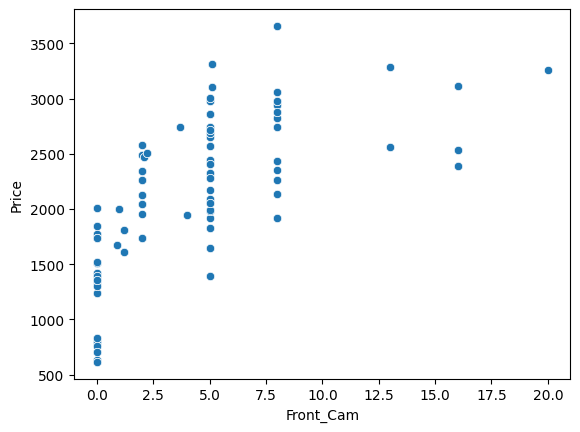

correlation
 [[1.         0.66188465]
 [0.66188465 1.        ]]


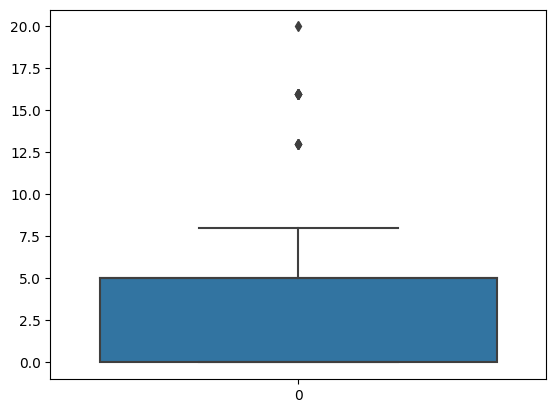

In [29]:
num("Front_Cam")

Battery

Data Type
 int64
Unique Datas
 [2610 1700 2000 1400 2500 1560 2800 4000 3000 2040 2300 3450 2900 2200
 1905 2930 3050 1200 7400 2250 2450 1600 3500 2390 2820 3350 3140 2100
 4060 1840 3200 3240  800 4500 1500 4450 1830 1100 2700  850 5000 3630
 1730 3400  900 9500 2600 1900  950 3100 2580 3430]
Describing the data
 count     153.000000
mean     2754.379085
std      1303.831691
min       800.000000
25%      2000.000000
50%      2700.000000
75%      3200.000000
max      9500.000000
Name: battery, dtype: float64


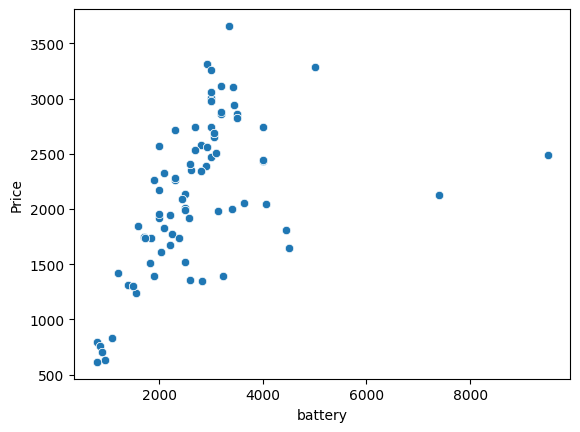

correlation
 [[1.         0.49578984]
 [0.49578984 1.        ]]


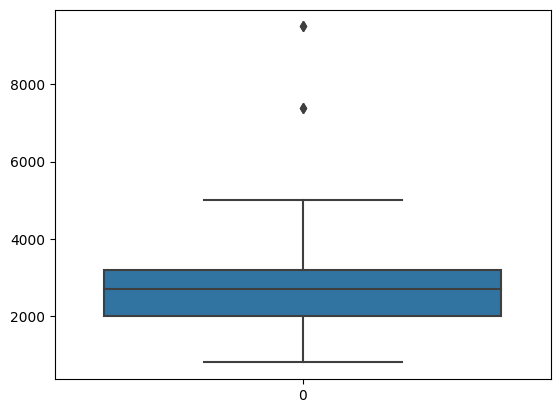

In [30]:
num("battery")

In [31]:
data.drop(data[data.battery>6000].index,axis=0,inplace=True)

Thickness

Data Type
 float64
Unique Datas
 [ 7.4  9.9  7.6 11.   9.5 11.7  8.1  7.7  8.9  8.2  8.3 10.   8.5  7.9
 10.3  8.8  6.4  6.9  5.9  9.8  9.2 10.1  8.7  7.5 12.3  9.1  9.3  5.1
  7.3  7.8  9.  13.2 10.6  8.4  9.7 10.8 12.9  8.  12.4  7.  10.9 10.2
 15.6 11.6  6.3  9.4 18.5 14.1  6.8]
Describing the data
 count    149.000000
mean       9.008054
std        2.255759
min        5.100000
25%        7.600000
50%        8.500000
75%       10.000000
max       18.500000
Name: thickness, dtype: float64


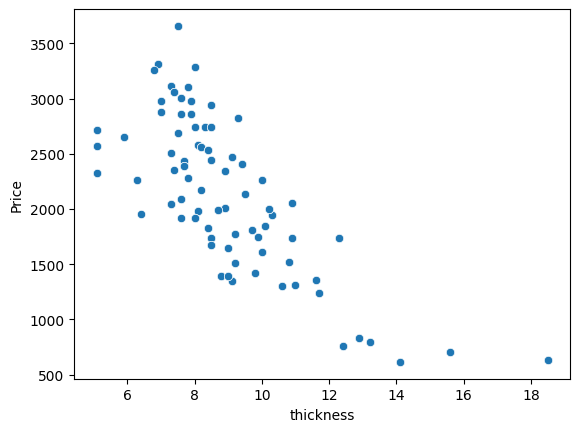

correlation
 [[ 1.        -0.7562429]
 [-0.7562429  1.       ]]


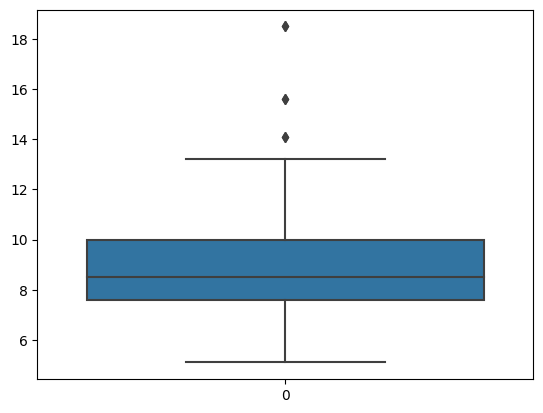

In [32]:
num("thickness")

In [33]:
data.reset_index(drop=True,inplace=True)

In [34]:
X=data.drop("Price",axis=1)
X.head()

,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [35]:
y=data.Price
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((119, 9), (30, 9), (119,), (30,))

Scaling

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Modelbuilding

In [39]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 164.5879661852145
Test RMSE = 199.27608930023897
Train R2_square = 0.9425289325018963
Test R2_square = 0.9283109225346757


In [40]:
DR=DecisionTreeRegressor(min_samples_leaf= 1,max_depth=11,max_features="auto")
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 0.0
Test RMSE = 132.6859701199289
Train R2_square = 1.0
Test R2_square = 0.9682171662432877


In [41]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 52.94920666596075
Test RMSE = 154.3247728871378
Train R2_square = 0.9940519854580535
Test R2_square = 0.9570054011607289


finding best Hyperparameters

In [42]:
n_estimators=list(range(50,500,50))
criterion=["squared_error", "absolute_error", "friedman_mse", "poisson"]
max_depth=list(range(2,20,2))
max_leaf_nodes=list(range(2,20,2))
random_grid_RF={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth,"max_leaf_nodes":max_leaf_nodes}

In [43]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)
RF_model.fit(X_train,y_train)
RF_model.best_params_

{'n_estimators': 300,
 'max_leaf_nodes': 18,
 'max_depth': 8,
 'criterion': 'friedman_mse'}

In [44]:
RF=RandomForestRegressor(n_estimators= 300,max_leaf_nodes= 18, max_depth= 8,criterion= 'friedman_mse')
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 82.02814418898159
Test RMSE = 154.21886578130002
Train R2_square = 0.9857249092132858
Test R2_square = 0.957064391963335
